# Using the Python API

<a target="_blank" href="https://colab.research.google.com/github/RobbinBouwmeester/Workshop_Grenoble_2025/blob/main/in-depth-python-api.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [161]:
!pip install plotly ms2rescore==3.1.4 im2deep==1.0.2 psm_utils==1.4.0


In [162]:
import logging
import plotly.io
import os
import requests
import tarfile
import zipfile


logging.basicConfig(level=logging.INFO)
#plotly.io.renderers.default = "plotly_mimetype+notebook"
plotly.io.renderers.default = "colab"

## Reading and parsing peptide-spectrum matches

In [163]:
from psm_utils.io import read_file

from ms2rescore.report.charts import score_histogram

In [164]:
import urllib.request

url = "https://github.com/compomics/Workshop_Grenoble_2025/raw/refs/heads/main/data/Velos005137.mgf"
output_path = "Velos005137.mgf"

urllib.request.urlretrieve(url, output_path)
print(f"Downloaded to: {output_path}")

Downloaded to: Velos005137.mgf


In [165]:
url = "https://rest.uniprot.org/uniprotkb/stream?format=fasta&query=%28%28taxonomy_id%3A186497%29%29"
output_path = "pyrococcus.fasta"

urllib.request.urlretrieve(url, output_path)
print(f"Downloaded to: {output_path}")

Downloaded to: pyrococcus.fasta


In [166]:
url = "https://raw.githubusercontent.com/HaoGroup-ProtContLib/Protein-Contaminant-Libraries-for-DDA-and-DIA-Proteomics/refs/heads/main/Universal%20protein%20contaminant%20FASTA/0602_Universal%20Contaminants.fasta"
output_path = "crap.fasta"

urllib.request.urlretrieve(url, output_path)
print(f"Downloaded to: {output_path}")

Downloaded to: crap.fasta


In [167]:
from pathlib import Path

# Define input and output file paths
human_fasta = Path("pyrococcus.fasta")
crap_fasta = Path("crap.fasta")
merged_fasta = Path("merged.fasta")

# Read and write files
with open(merged_fasta, 'w') as outfile:
    for fasta in [human_fasta, crap_fasta]:
        with open(fasta, 'r') as infile:
            for line in infile:
                outfile.write(line)

print(f"Merged FASTA written to: {merged_fasta}")

Merged FASTA written to: merged.fasta


In [168]:
url = "https://github.com/compomics/Workshop_Grenoble_2025/raw/refs/heads/main/database/combined_fasta.fasta"
output_path = "combined_fasta.fasta"

urllib.request.urlretrieve(url, output_path)
print(f"Downloaded to: {output_path}")

Downloaded to: combined_fasta.fasta


In [169]:
# Define URL and file paths
url = "https://github.com/lazear/sage/releases/download/v0.14.7/sage-v0.14.7-x86_64-unknown-linux-gnu.tar.gz"
archive_path = "sage-v0.14.7.tar.gz"
extract_dir = "./"

# Step 1: Download the file
print("Downloading archive...")
with requests.get(url, stream=True) as r:
    r.raise_for_status()
    with open(archive_path, 'wb') as f:
        for chunk in r.iter_content(chunk_size=8192):
            f.write(chunk)

print(f"Downloaded archive to: {archive_path}")

# Step 2: Extract the tar.gz file
print("Extracting archive...")
with tarfile.open(archive_path, "r:gz") as tar:
    tar.extractall(path=extract_dir)

print(f"Extracted to directory: {extract_dir}")

bin_sage_loc = "sage-v0.14.7-x86_64-unknown-linux-gnu/sage"

Downloaded archive to: sage-v0.14.7.tar.gz
Extracting archive...
Extracted to directory: ./


In [170]:
# Set the path to your executable file
file_path = 'sage-v0.14.7-x86_64-unknown-linux-gnu/sage'

# Set executable permission (equivalent to chmod +x)
os.chmod(file_path, os.stat(file_path).st_mode | 0o111)

In [171]:
url = "https://github.com/compomics/Workshop_Grenoble_2025/raw/refs/heads/main/json/params.json"
output_path = "params.json"

urllib.request.urlretrieve(url, output_path)
print(f"Downloaded to: {output_path}")

Downloaded to: params.json


In [ ]:
!{bin_sage_loc} params.json

[2025-03-26T14:12:12Z INFO  sage] generated 216247032 fragments, 9155884 peptides in 75326ms
[2025-03-26T14:12:12Z INFO  sage] processing files 0 .. 1 
[2025-03-26T14:12:13Z INFO  sage] - file IO:      675 ms


### Reading the PSM file

MS²Rescore is fully centered around the use of a `psm_utils` PSMList. This is a unified data representation of PSMs and their various attributes. Internally, it is simply a list of Pydantic data classes which represent PSMs. With the submodule `psm_utils.io`, we can read PSMs from a variety of file formats. Here, we will read a PSM file in the MaxQuant `msms.txt` format.

Importantly, for rescoring, the PSM file must contain all target and decoy PSMs, including PSMs that did not pass the FDR threshold. Most search engines must be specifically configured to return all PSMs without FDR filtering.


In [122]:
psm_list = read_file("results.sage.tsv", filetype="sage_tsv")
psm_list["spectrum_id"] = [str(spec_id) for spec_id in psm_list["spectrum_id"]]

For a quick inspection, we can format the PSM list as a Pandas dataframe and display the first few rows:

In [123]:
psm_list.to_dataframe().head()

peptidoform  \
0  ((D, None), (L, None), (L, None), (N, None), (...   
1  ((N, None), (N, None), (I, None), (T, None), (...   
2  ((T, None), (V, None), (D, None), (L, None), (...   
3  ((A, None), (L, None), (I, None), (P, None), (...   
4  ((D, None), (L, None), (L, None), (C, [+57.021...   

                                      spectrum_id          run collection  \
0  controllerType=0 controllerNumber=1 scan=14065  Velos005137       None   
1  controllerType=0 controllerNumber=1 scan=14545  Velos005137       None   
2  controllerType=0 controllerNumber=1 scan=14681  Velos005137       None   
3  controllerType=0 controllerNumber=1 scan=12006  Velos005137       None   
4  controllerType=0 controllerNumber=1 scan=16078  Velos005137       None   

  spectrum  is_decoy     score   qvalue   pep  precursor_mz  retention_time  \
0     None     False  2.148314  0.00015  None   1043.014325       78.985870   
1     None     False  2.120618  0.00015  None    919.970775       82.030870   
2     None     False  2.110584  0.00015  None    883.460275       82.870190   
3     None     False  2.095500  0.00015  None    830.467125       66.273510   
4     None     False  2.085359  0.00015  None    842.421225       92.212555   

  ion_mobility                                       protein_list  rank  \
0         None  [sp|Q51739|AOR_PYRFU, tr|A0A5C0XMD6|A0A5C0XMD6...     1   
1         None  [tr|A0A5C0XS68|A0A5C0XS68_PYRFU, tr|Q8TZH6|Q8T...     1   
2         None  [tr|A0A5C0XQF4|A0A5C0XQF4_PYRFU, tr|Q8U1U4|Q8U...     1   
3         None  [tr|A0A5C0XNB5|A0A5C0XNB5_PYRFU, tr|Q8U333|Q8U...     1   
4         None  [sp|Q51742|OTCA_PYRFU, tr|A0A5C0XU69|A0A5C0XU6...     1   

  source                        provenance_data metadata  \
0   sage  {'sage_filename': 'results.sage.tsv'}       {}   
1   sage  {'sage_filename': 'results.sage.tsv'}       {}   
2   sage  {'sage_filename': 'results.sage.tsv'}       {}   
3   sage  {'sage_filename': 'results.sage.tsv'}       {}   
4   sage  {'sage_filename': 'results.sage.tsv'}       {}   

                                  rescoring_features  
0  {'expmass': 2084.013, 'calcmass': 2084.0103, '...  
1  {'expmass': 1837.9259, 'calcmass': 1837.9244, ...  
2  {'expmass': 1764.9049, 'calcmass': 1764.9047, ...  
3  {'expmass': 1658.9186, 'calcmass': 1658.918, '...  
4  {'expmass': 2524.2402, 'calcmass': 2524.241, '...

We can also directly plot the current PSM score distributions:

In [124]:
score_histogram(psm_list)

### Parsing modification names

While `psm_utils` could take care of all file parsing, we must still map the amino acid modification names that were used by the search engine to ones that are recognized by tools such as MS²PiP and DeepLC. This includes:

- Names as used in the Unimod or PSI-MOD databases
- Accession numbers as used in the Unimod or PSI-MOD databases
- Chemical formulas
- Mass shifts in Da

Note that, for instance DeepLC, requires a chemical formula to encode modifications. It will not be able to correctly encode modifications if only the mass shift is provided. It is therefore always preferred to provide a name/accession of a database where this information can be retrieved, or provide the chemical formula directly.

If a chemical formula is provided, other tools, such as MS²PIP, can use it to derive the correct mass shift.

To map modification names, simply provide a dictionary to the `psm_list.map_modifications` method.

In [125]:
psm_list.rename_modifications({
    "gl": "Gln->pyro-Glu",
    "ox": "Oxidation",
    "ac": "Acetylation",
    "de": "Deamidation",
})

### Assigning fixed modifications

Some search engines (although not many) do not report fixed (sometimes also called static) modifications in their output PSM files. This is for instance the case for MaxQuant. With the method `psm_list.add_fixed_modifications`, we can systematically assign fixed modifications to their amino acid targets, as was done during the search.

Note that `add_fixed_modifications` adds the modification in the ProForma 2.0 encoding as a prefix. To fully apply the modifications in the sequence, use the `psm_list.apply_fixed_modifications` method. A PSM `ACDE/2` would therefore go from `<[U:4]@C>ACDE/2` to `AC[U:4]DE/2`.



In [126]:
psm_list.add_fixed_modifications([("U:Carbamidomethyl", ["C"])])
psm_list.apply_fixed_modifications()

## Adding rescoring features

In [127]:
import pandas as pd

from ms2rescore.feature_generators.basic import BasicFeatureGenerator
from ms2rescore.feature_generators.maxquant import MaxQuantFeatureGenerator
from ms2rescore.feature_generators.ms2pip import MS2PIPFeatureGenerator
from ms2rescore.feature_generators.deeplc import DeepLCFeatureGenerator

The PSM list, as read from a MaxQuant msms.txt file, currently does not contain any rescoring features:

In [128]:
pd.DataFrame(list(psm_list["rescoring_features"]))

expmass    calcmass  peptide_len  missed_cleavages  isotope_error  \
0      2084.01300  2084.01030         18.0               0.0        0.00000   
1      1837.92590  1837.92440         16.0               0.0        0.00000   
2      1764.90490  1764.90470         15.0               0.0        0.00000   
3      1658.91860  1658.91800         16.0               0.0        0.00000   
4      2524.24020  2524.24100         21.0               0.0        0.00000   
...           ...         ...          ...               ...            ...   
13012   843.43850   843.47156          6.0               2.0        0.00000   
13013   843.43823   843.47156          6.0               2.0        0.00000   
13014  1869.98690  1866.91580         16.0               2.0        3.01005   
13015   657.41724   658.40137          6.0               1.0       -1.00335   
13016   769.43120   766.44495          6.0               1.0        3.01005   

       precursor_ppm  fragment_ppm  hyperscore  delta_next  delta_best  ...  \
0           1.288643      7.671556   57.790528   32.329190         0.0  ...   
1           0.797009      1.786930   52.803518   27.159572         0.0  ...   
2           0.138331      1.425564   48.384087   21.009725         0.0  ...   
3           0.367921      1.500806   57.858328   26.691359         0.0  ...   
4           0.290155      4.828781   63.832362   34.748355         0.0  ...   
...              ...           ...         ...         ...         ...  ...   
13012      39.220886   1092.095000   32.153323    0.648534         0.0  ...   
13013      39.510345   1091.040000   30.384971    0.291782         0.0  ...   
13014      32.736310    415.410280   29.922997    0.415714         0.0  ...   
13015      29.190216    918.500600   27.011247    0.000000         0.0  ...   
13016      31.030720    823.858300   31.141669    0.198563         0.0  ...   

       aligned_rt  predicted_rt  matched_peaks  longest_b  longest_y  \
0        0.766853      0.761479           22.0        7.0       14.0   
1        0.796416      0.698345           19.0        5.0       14.0   
2        0.804565      0.760866           17.0        3.0       13.0   
3        0.643432      0.661590           20.0        5.0       14.0   
4        0.895268      0.873394           24.0       12.0       12.0   
...           ...           ...            ...        ...        ...   
13012    0.087081      0.000000            6.0        2.0        2.0   
13013    0.085204      0.000000            6.0        2.0        2.0   
13014    0.641332      0.000000            7.0        5.0        1.0   
13015    0.091469      0.000000            7.0        4.0        1.0   
13016    0.163023      0.019640            8.0        2.0        2.0   

       longest_y_pct  matched_intensity_pct  scored_candidates    poisson  \
0           0.777778              50.901350             4768.0 -18.254886   
1           0.875000              76.585740             5668.0 -15.345532   
2           0.866667              74.714910             4783.0 -13.368652   
3           0.875000              59.344276             5653.0 -14.393100   
4           0.571429              50.642880             7276.0 -17.402852   
...              ...                    ...                ...        ...   
13012       0.333333              56.182354             7713.0  -1.986773   
13013       0.333333              58.188545             7635.0  -2.037420   
13014       0.062500              11.743408             7691.0  -2.220638   
13015       0.166667              12.358492             2894.0  -2.784865   
13016       0.333333               8.591642             5137.0  -2.927919   

       ms2_intensity  
0          38042.180  
1          74043.875  
2          74176.170  
3         466638.880  
4          93118.164  
...              ...  
13012    1898272.000  
13013     784093.200  
13014     266387.620  
13015      74372.460  
13016     352788.840  

[13017 rows x 21 columns]

Note that `psm_list[rescoring_features]` returns a Numpy array of dictionaries, but we can use Pandas to format it as a table.

### Basic features

Basic features from `BasicFeatureGenerator` can be added from any PSM list and contain simple feature, such as the search engine score, charge state, and absolute precursor mass error.

In [129]:
basic_fgen = BasicFeatureGenerator()
basic_fgen.add_features(psm_list)

In [130]:
pd.DataFrame(list(psm_list["rescoring_features"]))

expmass    calcmass  peptide_len  missed_cleavages  isotope_error  \
0      2084.01300  2084.01030         18.0               0.0        0.00000   
1      1837.92590  1837.92440         16.0               0.0        0.00000   
2      1764.90490  1764.90470         15.0               0.0        0.00000   
3      1658.91860  1658.91800         16.0               0.0        0.00000   
4      2524.24020  2524.24100         21.0               0.0        0.00000   
...           ...         ...          ...               ...            ...   
13012   843.43850   843.47156          6.0               2.0        0.00000   
13013   843.43823   843.47156          6.0               2.0        0.00000   
13014  1869.98690  1866.91580         16.0               2.0        3.01005   
13015   657.41724   658.40137          6.0               1.0       -1.00335   
13016   769.43120   766.44495          6.0               1.0        3.01005   

       precursor_ppm  fragment_ppm  hyperscore  delta_next  delta_best  ...  \
0           1.288643      7.671556   57.790528   32.329190         0.0  ...   
1           0.797009      1.786930   52.803518   27.159572         0.0  ...   
2           0.138331      1.425564   48.384087   21.009725         0.0  ...   
3           0.367921      1.500806   57.858328   26.691359         0.0  ...   
4           0.290155      4.828781   63.832362   34.748355         0.0  ...   
...              ...           ...         ...         ...         ...  ...   
13012      39.220886   1092.095000   32.153323    0.648534         0.0  ...   
13013      39.510345   1091.040000   30.384971    0.291782         0.0  ...   
13014      32.736310    415.410280   29.922997    0.415714         0.0  ...   
13015      29.190216    918.500600   27.011247    0.000000         0.0  ...   
13016      31.030720    823.858300   31.141669    0.198563         0.0  ...   

         poisson  ms2_intensity  charge_n  charge_2  charge_3  charge_4  \
0     -18.254886      38042.180         2         1         0         0   
1     -15.345532      74043.875         2         1         0         0   
2     -13.368652      74176.170         2         1         0         0   
3     -14.393100     466638.880         2         1         0         0   
4     -17.402852      93118.164         3         0         1         0   
...          ...            ...       ...       ...       ...       ...   
13012  -1.986773    1898272.000         2         1         0         0   
13013  -2.037420     784093.200         2         1         0         0   
13014  -2.220638     266387.620         3         0         1         0   
13015  -2.784865      74372.460         2         1         0         0   
13016  -2.927919     352788.840         2         1         0         0   

       charge_5  charge_6  abs_ms1_error_ppm  search_engine_score  
0             0         0           1.324610             2.148314  
1             0         0           0.815771             2.120618  
2             0         0           0.141737             2.110584  
3             0         0           0.483145             2.095500  
4             0         0       22064.900951             2.085359  
...         ...       ...                ...                  ...  
13012         0         0          39.055110             0.402773  
13013         0         0          39.374453             0.386167  
13014         0         0        1642.397367             0.377660  
13015         0         0        1490.172585             0.325292  
13016         0         0        3885.987678             0.319220  

[13017 rows x 29 columns]

Now the PSMs contain a simple set of features.

Note that the charge state is present as both an integer and a one-hot encoded vector. This is because charge state can act as both a categorical and a numerical feature. Simply put, sometimes an effect increases or decreases with increasing charge state, and sometimes it is simply different for different charge states.

### MS²PIP features

MS²PIP is a machine learning tool that predicts the MS2 spectrum of a peptide given its sequence. It is previously identified MS2 spectra and their corresponding peptide sequences. Because MS²PIP uses the highly performant - but traditional - machine learning approach XGBoost, it can already produce accurate predictions even if trained on smaller spectral libraries. This makes MS²PIP a very flexible platform to train new models on custom datasets. Nevertheless, MS²PIP comes with several pre-trained models, which we will use in this tutorial.

Because traditional proteomics search engines do not fully consider MS2 peak intensities in their scoring functions, adding rescoring features derived from spectrum prediction tools has proved to be a very effective way to further improve the sensitivity of peptide-spectrum matching. Generating features from MS²PIP predictions follows these steps:

1. Predict MS2 spectra for all PSMs in the dataset, including decoy PSMs and low scoring target PSMs.
2. Read and parse the observed MS2 spectra from the original spectrum files (MGF or mzML).
3. Compare the predicted and observed spectra using various similarity metrics, which are returned as rescoring features.


#### Configuring MS²PIP

In contrast to the basic feature generator, MS²PIP requires some parameters to be set and requires access to the original observed peptide spectra:

- `model`: Name of the prediction model to be used. This strongly depends on the dataset your are rescoring. A list of all MS²PIP models is available on https://ms2pip.readthedocs.io/en/latest/prediction-models/.
- `ms2_tolerance`: As MS²PIP must reannotate the observed MS2 spectra, a mass tolerance must be set. For MS²PIP, this is configured in Dalton. A good value for Orbitrap spectra, for example, is `0.02`.
- `spectrum_path`: Path to the original spectrum files. This can be a single file, or a directory containing multiple files. The spectrum files must be in MGF or mzML format.
- `spectrum_id_pattern`: A regular expression pattern to extract the spectrum ID from the PSMs (see below).
- `processes`: Number of CPU processes to use for parallel processing. Note that higher values can lead to memory issues.

In [131]:
ms2pip_fgen = MS2PIPFeatureGenerator(
    model="HCD",
    ms2_tolerance=0.02,
    spectrum_path="Velos005137.mgf",
#    spectrum_id_pattern=r".*",
#    psm_id_pattern=r".*",
    processes=8,
)

A very import aspect of generating MS²PIP-derived features is making sure the peptide identifications are matched to the correct spectra. Unfortunately, many search engines alter spectrum identifiers in their output files. In the case of MaxQuant and data from Thermo instruments, fortunately, the scan numbers are returned. If the spectrum files have been converted to MGF with ThermoRawFileParser, we need to extract these exact scan numbers from the spectrum `TITLE` entries. This can be done with a regular expression pattern. For example, the following pattern extracts the scan number from the following spectrum title:

```python
spectrum_id_pattern = r"scan=(\d+)"
```

```
mzspec=20161213_NGHF_DBJ_SA_Exp3A_HeLa_1ug_7min_15000_02.raw: controllerType=0 controllerNumber=1 scan=2
```

We can test this with the first spectrum in the file:

In [132]:
from pyteomics.mgf import read as read_mgf

for spectrum in read_mgf("Velos005137.mgf"):
    spectrum_id = spectrum["params"]["title"]
    break
print(spectrum_id)

controllerType=0 controllerNumber=1 scan=392


We can use this scan number to retrieve its corresponding PSM:

In [133]:
psm_list[psm_list["spectrum_id"] == "controllerType=0 controllerNumber=1 scan=2162"]

PSMList(
    psm_list=[
        PSM(
            peptidoform=Peptidoform('DRTKGLGLTR/2'),
            spectrum_id='controllerType=0 controllerNumber=1 scan=2162',
            run='Velos005137',
            collection=None,
            spectrum=None,
            is_decoy=True,
            score=1.0284926,
            qvalue=0.049453825,
            pep=None,
            precursor_mz=558.3033250320699,
            retention_time=14.659252,
            ion_mobility=None,
            protein_list=['rev_sp|O43639|NCK2_HUMAN'],
            rank=1,
            source='sage',
            provenance_data={'sage_filename': 'results.sage.tsv'},
            metadata={},
            rescoring_features={
                'expmass': 1114.591,
                'calcmass': 1115.6411,
                'peptide_len': 10.0,
                'missed_cleavages': 2.0,
                'isotope_error': -1.00335,
                ... +24
            }
        )
    ]
)

In [134]:
psm_list["spectrum_id"]

array(['controllerType=0 controllerNumber=1 scan=14065',
       'controllerType=0 controllerNumber=1 scan=14545',
       'controllerType=0 controllerNumber=1 scan=14681', ...,
       'controllerType=0 controllerNumber=1 scan=11968',
       'controllerType=0 controllerNumber=1 scan=1286',
       'controllerType=0 controllerNumber=1 scan=2550'], dtype=object)

#### Generating MS²PIP features

In [135]:
ms2pip_fgen.add_features(psm_list)

Output()

In [136]:
pd.DataFrame(list(psm_list["rescoring_features"]))

expmass    calcmass  peptide_len  missed_cleavages  isotope_error  \
0      2084.01300  2084.01030         18.0               0.0        0.00000   
1      1837.92590  1837.92440         16.0               0.0        0.00000   
2      1764.90490  1764.90470         15.0               0.0        0.00000   
3      1658.91860  1658.91800         16.0               0.0        0.00000   
4      2524.24020  2524.24100         21.0               0.0        0.00000   
...           ...         ...          ...               ...            ...   
13012   843.43850   843.47156          6.0               2.0        0.00000   
13013   843.43823   843.47156          6.0               2.0        0.00000   
13014  1869.98690  1866.91580         16.0               2.0        3.01005   
13015   657.41724   658.40137          6.0               1.0       -1.00335   
13016   769.43120   766.44495          6.0               1.0        3.01005   

       precursor_ppm  fragment_ppm  hyperscore  delta_next  delta_best  ...  \
0           1.288643      7.671556   57.790528   32.329190         0.0  ...   
1           0.797009      1.786930   52.803518   27.159572         0.0  ...   
2           0.138331      1.425564   48.384087   21.009725         0.0  ...   
3           0.367921      1.500806   57.858328   26.691359         0.0  ...   
4           0.290155      4.828781   63.832362   34.748355         0.0  ...   
...              ...           ...         ...         ...         ...  ...   
13012      39.220886   1092.095000   32.153323    0.648534         0.0  ...   
13013      39.510345   1091.040000   30.384971    0.291782         0.0  ...   
13014      32.736310    415.410280   29.922997    0.415714         0.0  ...   
13015      29.190216    918.500600   27.011247    0.000000         0.0  ...   
13016      31.030720    823.858300   31.141669    0.198563         0.0  ...   

       iony_abs_diff_Q2  iony_abs_diff_Q3  iony_mean_abs_diff  \
0              0.008751          0.013583            0.011822   
1              0.009776          0.048503            0.029965   
2              0.019540          0.041279            0.030045   
3              0.015317          0.033607            0.024851   
4              0.003275          0.017233            0.012436   
...                 ...               ...                 ...   
13012          0.002484          0.021414            0.010531   
13013          0.002693          0.021414            0.010125   
13014          0.000043          0.000327            0.002268   
13015          0.022639          0.025885            0.024302   
13016          0.012888          0.015530            0.014312   

       iony_std_abs_diff   dotprod  dotprod_ionb  dotprod_iony       cos  \
0               0.014183  0.006765  2.959215e-03      0.003806  0.926524   
1               0.035967  0.016777  6.845365e-03      0.009932  0.881641   
2               0.031529  0.016264  6.349362e-03      0.009915  0.899856   
3               0.032180  0.013125  1.602099e-03      0.011523  0.918912   
4               0.021230  0.005220  1.033328e-03      0.004187  0.800775   
...                  ...       ...           ...           ...       ...   
13012           0.011002  0.001258  1.251759e-03      0.000006  0.263817   
13013           0.010348  0.001326  1.261313e-03      0.000065  0.276149   
13014           0.006179  0.000019  7.299405e-07      0.000018  0.036348   
13015           0.012602  0.015334  1.403000e-02      0.001304  0.911919   
13016           0.015199  0.000761  3.289625e-05      0.000729  0.885543   

       cos_ionb  cos_iony  
0      0.961562  0.947877  
1      0.992840  0.945397  
2      0.983414  0.958571  
3      0.993807  0.942750  
4      0.658017  0.915617  
...         ...       ...  
13012  0.475086  0.589768  
13013  0.475365  0.774303  
13014  0.012114  0.083708  
13015  0.998634  0.819135  
13016  0.437383  0.934403  

[13017 rows x 100 columns]

### Generating DeepLC features

In [137]:
deeplc_fgen = DeepLCFeatureGenerator(
    lower_score_is_better=False,
    calibration_set_size=0.15,
    spectrum_path=None,
    processes=8,
    deeplc_retrain=False,
)

deeplc_fgen.add_features(psm_list)

### Generating features from MaxQuant output

While MaxQuant msms.txt files do not contain directly usable rescoring features, it does contain various metrics from spectrum matching from which we can calculate rescoring features. These include features related to the mass error of the annotated MS2 peaks and the summed intensity of the annotated peaks.

The data that is used to calculate these features is stored in the PSM `metadata` attributes. For instance:

In [138]:
psm_features = pd.DataFrame(list(psm_list["rescoring_features"]))

In [139]:
sum(list(psm_list["is_decoy"]))

1675

In [140]:
plot_std_features = ['missed_cleavages',
    'isotope_error',
    'precursor_ppm',
    'fragment_ppm',
    'hyperscore']

### Assessing individual feature performance before rescoring

In [141]:
import plotly.express as px
from ms2rescore.report.charts import (
    calculate_feature_qvalues,
    feature_ecdf_auc_bar,
    fdr_plot,
    ms2pip_correlation,
)
import deeplc.plot

features = pd.DataFrame(list(psm_list["rescoring_features"]))

The following plot shows the number of identified PSM at varying FDR thresholds, where the red line indicates the commonly used 1% FDR threshold.

In [142]:
psm_list.calculate_qvalues()  # msms.txt does not contain q-values
fig = fdr_plot(psm_list.to_dataframe(), fdr_thresholds=None, log=False)
fig.show()

We can make a similar plot for each of the rescoring features by simply calculating q-values as if the feature were a search engine score.

In [143]:
feature_qvalues, feature_ecdf_auc = calculate_feature_qvalues(
    features=features,
    is_decoy=psm_list["is_decoy"],
)

In [144]:
feature_names = {
    "basic": basic_fgen.feature_names,
    "ms2pip": ms2pip_fgen.feature_names,
    "deeplc": deeplc_fgen.feature_names,
}
feature_generator_map = {name: gen for gen, f_list in feature_names.items() for name in f_list}

feature_qvalues_melt = feature_qvalues.melt(var_name="feature", value_name="q-value")
feature_qvalues_melt["feature_generator"] = feature_qvalues_melt["feature"].map(feature_generator_map)

In [145]:
# Plot takes 100MB in saved file...

# fig = px.ecdf(
#     data_frame=feature_qvalues_melt,
#     x="q-value",
#     color="feature_generator",
#     line_dash="feature",
# )
# fig.show()

The larger the area under the curve (AUC) is for each line, the better. We can therefore visualize the same information in a more easy-to-interpret bar chart with the AUCs, which were already calculated by the `calculate_feature_qvalues` function.

In [146]:
feature_ecdf_auc["feature_generator"] = feature_ecdf_auc["feature"].map(feature_generator_map)

In [147]:
fig = feature_ecdf_auc_bar(feature_ecdf_auc)
fig.show()

Importantly, a low q-value ECDF AUC does not necessarily mean that a feature is not valuable for rescoring. The more orthogonal a feature is to the other information already used in PSM scoring, the more it will help to confidently identify PSMs. For instance, retention time features are completely independent from the information used in a traditional search engine. When combined with other scoring information, they can provide a substantial boost in sensitivity.

The quality of specific rescoring features can also be assessed in a manner specific to the feature. For instance, we can plot the distribution of the MS²PIP pearson correlations for target PSMs that initially passed the FDR threshold:

In [148]:
fig = ms2pip_correlation(
    features=features,
    is_decoy=psm_list["is_decoy"],
    qvalue=psm_list["qvalue"]
)
fig.show()

For DeepLC, we can plot the predicted retention time versus the observed retention time:

In [149]:
sum(psm_list["is_decoy"])

1675

In [150]:
fig = deeplc.plot.scatter(
    df=features[(~psm_list["is_decoy"]) & (psm_list["qvalue"] <= 0.01)],  # noqa: E712
    predicted_column="predicted_retention_time_best",
    observed_column="observed_retention_time_best",
)
fig.show()

DeepLC also provides a function to plot the current relative mean absolute error (rMAE) of the predicted retention times against a distribution of 460 benchmark datasets. The lower the rMAE, the better.

In [151]:
fig = deeplc.plot.distribution_baseline(
    df=features[(~psm_list["is_decoy"]) & (psm_list["qvalue"] <= 0.01)],  # noqa: E712
    predicted_column="predicted_retention_time_best",
    observed_column="observed_retention_time_best",
)
fig.show()

## Rescoring

### Using Mokapot directly

In [152]:
import matplotlib.pyplot as plt
from mokapot import brew
from ms2rescore.rescoring_engines.mokapot import convert_psm_list

%matplotlib inline

In this tutorial, we will use Mokapot as rescoring engine. By default it employs the same methodologies as Percolator, but is fully implemented in Python. First, the PSM list must be converted to a Mokapot `LinearPsmDataset`.

In [153]:
linear_psm_dataset = convert_psm_list(psm_list)

Then, the Mokapot `brew` function can be called to rescore the PSMs:

In [154]:
confidence_results, models = brew(linear_psm_dataset)

Mokapot contains a function to conveniently plot the results:

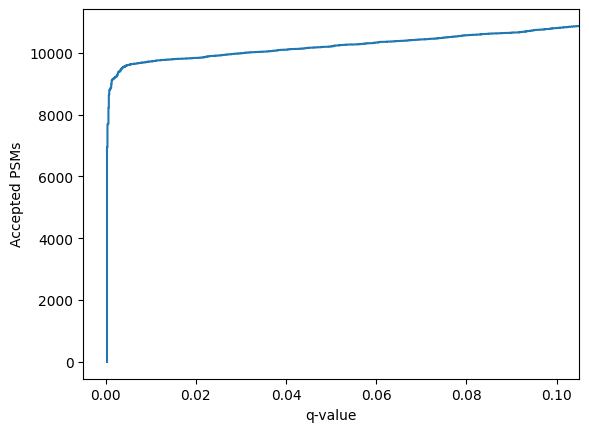

In [155]:
confidence_results.plot_qvalues()
plt.show()

Or to compare the un-rescored PSMs to the rescored PSMs:

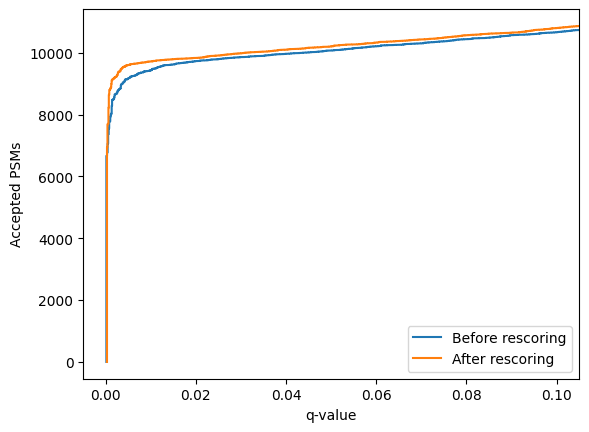

In [156]:
linear_psm_dataset.assign_confidence().plot_qvalues(label="Before rescoring")
confidence_results.plot_qvalues(label="After rescoring")
plt.legend()
plt.show()

Using mokapot directly allows us to quickly generate `LinearPsmDataset` objects with different feature sets, for instance:

- Only basic features
- Basic + MaxQuant-derived features (mimicking a traditional Percolator rescoring run)
- Basic + MaxQuant-derived + MS²PIP features
- Basic + MaxQuant-derived + MS²PIP + DeepLC features


In [157]:
feature_sets = {
    "basic": feature_names["basic"],
    "basic_mq_ms2pip": feature_names["basic"] + feature_names["ms2pip"],
    "basic_mq_ms2pip_deeplc": feature_names["basic"] + feature_names["ms2pip"] + feature_names["deeplc"],
}

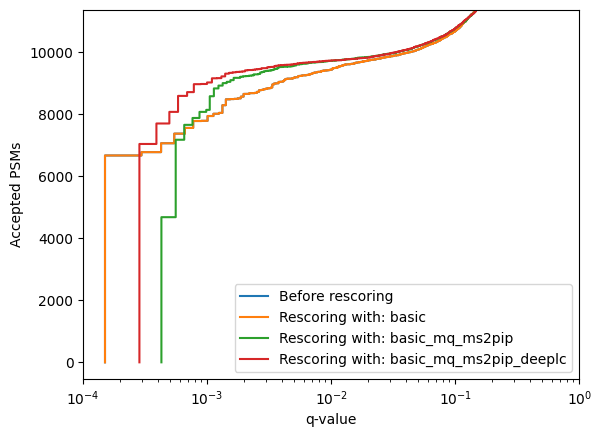

In [158]:
linear_psm_dataset.assign_confidence().plot_qvalues(label="Before rescoring")

for feature_set, features in feature_sets.items():
    linear_psm_dataset = convert_psm_list(psm_list, features)
    confidence_results, models = brew(linear_psm_dataset)
    confidence_results.plot_qvalues(label=f"Rescoring with: {feature_set}")

plt.xscale('log')
plt.xlim(1e-4, 1)
plt.legend()
plt.show()

### Using Mokapot within MS²Rescore

Mokapot can also be used for rescoring with the higher-level integration in MS²Rescore. Simply pass
a PSMList object with rescoring features added to the `rescore` function. Doing so will automatically
convert the PSMList to a Mokapot `LinearPsmDataset`, run the `brew` function, and update the original
PSMList with the new scores, q-values and PEPs.

In [159]:
from ms2rescore.rescoring_engines import mokapot

mokapot.rescore(psm_list)

In [160]:
score_histogram(psm_list.to_dataframe())